In [4]:
import numpy as np
import pandas as pd
import 

In [27]:
base = pd.read_csv('adult.csv')
base.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

## Remoção de colunas pouco relevantes
Capital gain e capital loss possuíam uma grande quantidade de valores iguais a 0. Native country possuía uma grande quantidade de valores iguais a "United States".

In [6]:
base1 = base.drop(['capital.gain', 'capital.loss','native.country'], axis=1)
base1.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  hours.per.week income  
0                  ?  Not-in-family  White  Female              40  <=50K  
1    Exec-managerial  Not-in-family  White  Female              18  <=50K  
2                  ?      Unmarried  Black  Female              40  <=50K  
3  Machine-op-inspct      Unmarried  White  Female              40  <=50K  
4     Prof-specialty      Own-child  White  Female              40  <=50K

## Categorização de variáveis

In [7]:
base1.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
income            object
dtype: object

In [8]:
base1['workclass'] = base1['workclass'].astype('category')
base1['education'] = base1['education'].astype('category')
base1['marital.status'] = base1['marital.status'].astype('category')
base1['occupation'] = base1['occupation'].astype('category')
base1['relationship'] = base1['relationship'].astype('category')
base1['race'] = base1['race'].astype('category')
base1['sex'] = base1['sex'].astype('category')
base1['income'] = base1['income'].astype('category')
base1.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
hours.per.week       int64
income            category
dtype: object

In [9]:
base1['workclass'].cat.categories = ['Doesnt-work', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
base1.head()

age    workclass  fnlwgt     education  education.num marital.status  \
0   90  Doesnt-work   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66  Doesnt-work  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  hours.per.week income  
0                  ?  Not-in-family  White  Female              40  <=50K  
1    Exec-managerial  Not-in-family  White  Female              18  <=50K  
2                  ?      Unmarried  Black  Female              40  <=50K  
3  Machine-op-inspct      Unmarried  White  Female              40  <=50K  
4     Prof-specialty      Own-child  White  Female              40  <=50K

In [10]:
base1['occupation'].cat.categories = ['Doesnt-work', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
       'Sales', 'Tech-support', 'Transport-moving']
base1.head()

age    workclass  fnlwgt     education  education.num marital.status  \
0   90  Doesnt-work   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66  Doesnt-work  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  hours.per.week income  
0        Doesnt-work  Not-in-family  White  Female              40  <=50K  
1    Exec-managerial  Not-in-family  White  Female              18  <=50K  
2        Doesnt-work      Unmarried  Black  Female              40  <=50K  
3  Machine-op-inspct      Unmarried  White  Female              40  <=50K  
4     Prof-specialty      Own-child  White  Female              40  <=50K

## Normalização de variáveis
Normalização das variáveis age, education.num e hours.per.week

In [14]:
base1['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [20]:
base1['age'] = (base1['age'] - base1['age'].min()) / (base1['age'].max() - base1['age'].min())
base1['age'].describe()

count    32561.000000
mean         0.295639
std          0.186855
min          0.000000
25%          0.150685
50%          0.273973
75%          0.424658
max          1.000000
Name: age, dtype: float64

In [22]:
base1['education.num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

In [23]:
base1['education.num'] = (base1['education.num'] - base1['education.num'].min()) / (base1['education.num'].max() - base1['education.num'].min())
base1['education.num'].describe()

count    32561.000000
mean         0.605379
std          0.171515
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
Name: education.num, dtype: float64

In [24]:
base1['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [26]:
base1['hours.per.week'] = (base1['hours.per.week'] - base1['hours.per.week'].min()) / (base1['hours.per.week'].max() - base1['hours.per.week'].min())
base1['hours.per.week'].describe()

count    32561.000000
mean         0.402423
std          0.125994
min          0.000000
25%          0.397959
50%          0.397959
75%          0.448980
max          1.000000
Name: hours.per.week, dtype: float64

## Remoção de outliers

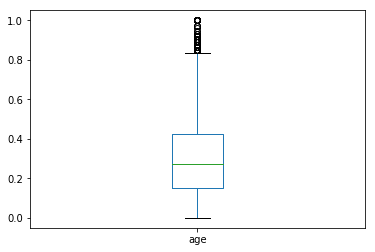

In [44]:
base1['age'].plot.box()

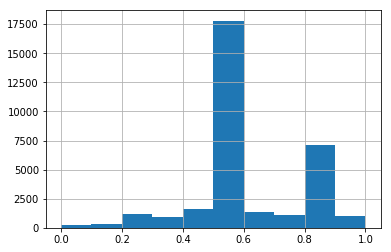

In [42]:
base1['age'].hist()

## Estatísticas descritivas com visualização


In [55]:
print(base1[(base1['sex'] == 'Male')]['age'].mean())
print(base1[(base1['sex'] == 'Female')]['age'].mean())

0.30730886984729705
0.2720305538845428


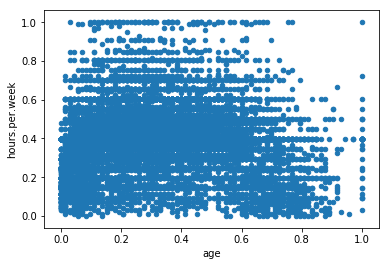

In [58]:
base1.plot.scatter(x='age', y='hours.per.week')

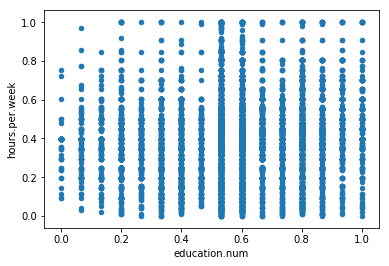

In [57]:
base1.plot.scatter(x='education.num', y ='hours.per.week')

In [59]:
base1.cov()

age        fnlwgt  education.num  hours.per.week
age                0.034915 -1.511653e+03       0.001171        0.001619
fnlwgt         -1511.653223  1.114080e+10    -781.968487     -249.596186
education.num      0.001171 -7.819685e+02       0.029417        0.003201
hours.per.week     0.001619 -2.495962e+02       0.003201        0.015875

## Testes de hipótese